In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import json

In [2]:
data1 = pd.read_json("#KartuPraKerja/#KartuPraKerja.json", lines = True)
data2 = pd.read_json("#PraKerja/#PraKerja.json", lines = True)
data3 = pd.read_json("Kartu/KartuPraKerja.json", lines = True)

In [3]:
data = data1["text"][0:3]

In [4]:
data = data.append(data2["text"][0:3])

In [5]:
data = data.append(data3["text"][0:3])

In [6]:
for i in data:
    print ("===================")
    print(i)

Ini cuma proyek. Makanya gak pernah beres.

#kartuprakerja https://t.co/sEDIThxakl
Alhmdulillah lulus..trima kasih @ruangguru @skillacademy_id 
#kartuprakerja @jokowi ...semoga bermanfaat https://t.co/AecvTJ9elh
RT @joeyakarta: Saya rutin memberikan pelatihan memancing scr online pada kucing-kucing saya. Menyenangkan memang. Namun, jelas tidak bergu…
RT @anakpresidenJKW: Di hari pendidikan tahun ini... hanya RuangGuru yang Kaya Raya.. 5,6 Trilyun.. Mundur Mu demi uang belvara
.
Sementara…
RT @dzulfian: Tidak ada guna @AdamasBelva mundur dari stafsus krn hmpir 70% proyek kartu #prakerja gelombang 1 dikuasai @ruangguru . DPR su…
RT @dzulfian: Tidak ada guna @AdamasBelva mundur dari stafsus krn hmpir 70% proyek kartu #prakerja gelombang 1 dikuasai @ruangguru . DPR su…
Please evaluate and rebuild these Kartu Pra Kerja stuffs. https://t.co/OHxshf78vr https://t.co/KsBNA549N7
RT @HukumDan: @haikal_hassan Salah satu orang yg kebagian jatah 5 trilliun lebih proyek kartu pra kerja. 
Miris https:

# Cleaning data

In [7]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords

In [8]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9./_]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'#[A-Za-z0-9./_]+'
pat4 = r'RT'
combined_pat = r'|'.join((pat1,pat2,pat3,pat4))
stop_words = set(stopwords.words('indonesian'))

In [9]:
def cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, "", souped)
    try:
        clean = stripped.decode("utf-8").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    filtered_words = [w for w in words if not w in stop_words]
    return (" ".join(filtered_words)).strip()

In [10]:
data1_text = data1["text"]
data2_text = data2["text"]
data3_text = data3["text"]

In [11]:
data1_text

0       Ini cuma proyek. Makanya gak pernah beres.\n\n...
1       Alhmdulillah lulus..trima kasih @ruangguru @sk...
2       RT @joeyakarta: Saya rutin memberikan pelatiha...
3       RT @joeyakarta: "Tak ada makan siang gratis!"\...
4       Hak ada di penerima. Kalau meragukan kredibili...
5       RT @dzulfian: 'Jgn sampai Pak @jokowi dibohong...
6       Kuy isi waktu senggang dg gabung grup chat sup...
7       ;-) pengen tahu aja nih si @AdamasBelva n komp...
8       RT @beritaKBR: "@KomnasHAM  menilai, kartu pra...
9       Udah llos kartu prakerja? Atau msh nunggu peng...
10      Udah lolos kartu prakerja? Atau msh nunggu pen...
11      Buat yg belum atau masi mau pilih pelatihannya...
12      [PENTING]\nPendaftaran prakerja Gel-3 sudah tu...
13      RT @dzulfian: Penelitian terbaru  @IndefEconom...
14      JAKARTA, https://t.co/vuXwLcgDO7 - Menteri Keu...
15      Baca Berita katanya tgl 1 Mei bakal cair tapi ...
16      Upaya Pemerintah untuk terus meningkatkan kese...
17      RT @jo

In [12]:
data1_clean = list(dict.fromkeys(data1_text))
data2_clean = list(dict.fromkeys(data2_text))
data3_clean = list(dict.fromkeys(data3_text))

In [13]:
print(len(data1_text))
print(len(data1_clean))
print("===============")
print(len(data2_text))
print(len(data2_clean))
print("=============")
print(len(data3_text))
print(len(data3_clean))

1586
753
2745
504
7800
1375


In [14]:
1 - (len(data1_clean)+len(data2_clean)+len(data3_clean))/(len(data1)+len(data2)+len(data3))

0.7830351990767456

In [15]:
all_data = data1_clean + data2_clean + data3_clean

In [16]:
len(all_data)

2632

# Analisis Sentimen dengan TextBlob

In [17]:
from textblob import TextBlob
from tqdm import tqdm
from googletrans import Translator

In [18]:
for i in tqdm(range(len(all_data))):
    all_data[i] = cleaner(all_data[i])

In [19]:
count_pos = 0
count_neg = 0
count_netral = 0
not_valid = 0
polaritas = []

In [20]:
# polarity = TextBlob("terimakasih").translate(from_lang='id', to='en').sentiment.polarity

In [21]:
len(all_data)

2632

In [22]:
translate_data = ['' for i in range(len(all_data))]
trans = Translator()
# trans.translate("halo nama saya zunan", src='id',  dest='en').text
for i in range(len(all_data)):
    try :
        translate_data[i] = trans.translate(all_data[i], src='id',  dest='en').text
    except:
        print(i)

In [30]:
print("startinggg")
for i in tqdm(range(len(all_data))):
#     print(i)
    try:
        polarity = TextBlob(translate_data[i]).sentiment.polarity
        polaritas.append(polarity)
        if polarity>0:
            count_pos += 1
        elif polarity<0:
            count_neg += 1
        else:
            count_netral += 1
    except:
        not_valid += 1
        polaritas.append(999)
        print(i)
print("FINISHH")

In [ ]:
print("startinggg")
for i in range(len(all_data)):
    try:
        polarity = TextBlob(all_data[i]).translate(from_lang='id', to='en').sentiment.polarity
        if polarity>0:
            count_pos += 1
        elif polarity<0:
            count_neg += 1
        else:
            count_netral += 1
    except:
        not_valid += 1
print("FINISHH")

In [31]:
print('positif : ', count_pos)
print('negeatif : ', count_neg)

In [30]:
len(all_data)

2632

In [31]:
all_data_clean = all_data.remove("")

In [32]:
len(all_data_clean)

TypeError: object of type 'NoneType' has no len()

In [34]:
datafix = pd.DataFrame(all_data)

In [36]:
datafix.to_csv("data_clean.csv")

# load data translate

In [42]:
data_fix = pd.read_csv("data_clean _translate.csv")

In [44]:
data_translate = data_fix["translate"]

In [45]:
count_pos = 0
count_neg = 0
count_netral = 0
not_valid = 0
polaritas = []

In [46]:
print("startinggg")
for i in tqdm(range(len(data_translate))):
#     print(i)
    try:
        polarity = TextBlob(data_translate[i]).sentiment.polarity
        polaritas.append(polarity)
        if polarity>0:
            count_pos += 1
        elif polarity<0:
            count_neg += 1
        else:
            count_netral += 1
    except:
        not_valid += 1
        polaritas.append(999)
        print(i)
print("FINISHH")

In [47]:
print('positif : ', count_pos)
print('negeatif : ', count_neg)
print('netral: ', count_netral)
print('not valid : ', not_valid)

In [49]:
import matplotlib.pyplot as plt

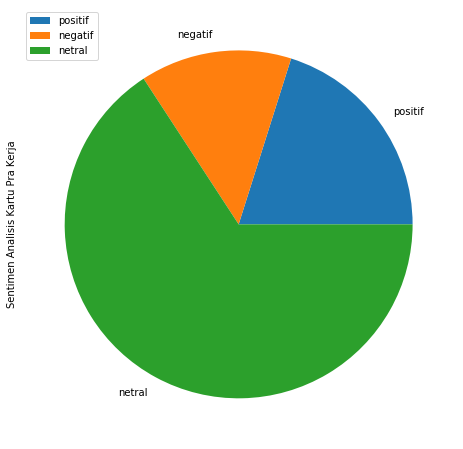

In [52]:
df = pd.DataFrame([526,368,1720], index=['positif', 'negatif', 'netral'], columns=['Sentimen Analisis Kartu Pra Kerja'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.savefig("kartu.jpg")